<a href="https://colab.research.google.com/github/nedokormysh/GB_App_Statistics_Med/blob/lesson_7_survive/GB_app_statistics_med_hw_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 7. Анализ выживаемости

# Условие
Проведите анализ выживаемости пациентов с раком
толстой кишки на приложенном к уроку датасете,
используя код с занятия.
Попробуйте сравнить кривые выживаемости с
различными ковариатами.

# Установка и загрузка пакетов

In [ ]:
# # Узнать версию R
# R.version.string

[1] "R version 4.4.0 (2024-04-24)"

In [ ]:
install.packages("skimr")
# install.packages("ggsurvfit")
install.packages("gtsummary")
install.packages("tidycmprsk")
install.packages("survminer")
# install.packages("condsurv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




In [ ]:
install.packages("devtools")
library(devtools)
install_version("ggsurvfit", version = "1.0.0")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’, ‘shiny’, ‘downlit’, ‘miniUI’, ‘pkgdown’, ‘profvis’, ‘urlchecker’


Loading required package: usethis




stringi    (1.8.3 -> 1.8.4) [CRAN]
tidyselect (1.2.0 -> 1.2.1) [CRAN]
munsell    (0.5.0 -> 0.5.1) [CRAN]
farver     (2.1.1 -> 2.1.2) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
gtable     (0.3.4 -> 0.3.5) [CRAN]
ggplot2    (3.4.4 -> 3.5.1) [CRAN]
patchwork  (NA    -> 1.2.0) [CRAN]
broom      (1.0.5 -> 1.0.6) [CRAN]


Installing 9 packages: stringi, tidyselect, munsell, farver, isoband, gtable, ggplot2, patchwork, broom

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Загрузка пакетов
library(survival)
library(lubridate)
library(tidyverse)
library(ggplot2)
library(ggsurvfit)
library(gtsummary)
library(tidycmprsk)
library(survminer)
library(readr)

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




# Загрузка данных

In [ ]:
# Загрузка данных из файла colon_dataset.tsv
colon_cancer_data <- read_tsv("colon_dataset.tsv")

# Отображение первых 5 строк датасета
head(colon_cancer_data, 10)

Rows: 1858 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): rx
dbl (15): id, study, sex, age, obstruct, perfor, adhere, nodes, status, diff...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,study,rx,sex,age,obstruct,perfor,adhere,nodes,status,differ,extent,surg,node4,time,etype
<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,1521,2
1,1,Lev+5FU,1,43,0,0,0,5,1,2,3,0,1,968,1
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,2
2,1,Lev+5FU,1,63,0,0,0,1,0,2,3,0,0,3087,1
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,963,2
3,1,Obs,0,71,0,0,1,7,1,2,2,0,1,542,1
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,293,2
4,1,Lev+5FU,0,66,1,0,0,6,1,2,3,1,1,245,1
5,1,Obs,1,69,0,0,0,22,1,2,3,1,1,659,2


## Общая оценка выживаемости


### Без ковариат
Построим кривую выживаемости для всей выборки пациентов с раком толстой кишки

In [ ]:
# Создание объекта выживаемости
surv_object <- Surv(time = colon_cancer_data$time, event = colon_cancer_data$status)

# Проверка объекта выживаемости
head(surv_object)

[1] 1521   968  3087+ 3087+  963   542 

In [ ]:
# survfit2(Surv(time, status) ~ 1, data = colon_cancer_data) %>%
#   ggsurvfit() +
#   labs(
#     x = "Days",
#     y = "Overall survival probability"
#   ) +
#   add_confidence_interval() +
#   add_risktable()

In [ ]:
km_fit <- survfit(Surv(time, status) ~ 1, data = colon_cancer_data)
str(km_fit)

List of 16
 $ n        : int 1858
 $ time     : num [1:1067] 8 9 19 20 23 24 28 34 35 36 ...
 $ n.risk   : num [1:1067] 1858 1857 1856 1855 1854 ...
 $ n.event  : num [1:1067] 1 1 1 1 1 1 1 1 1 1 ...
 $ n.censor : num [1:1067] 0 0 0 0 1 1 0 0 0 0 ...
 $ surv     : num [1:1067] 0.999 0.999 0.998 0.998 0.997 ...
 $ std.err  : num [1:1067] 0.000538 0.000762 0.000933 0.001078 0.001205 ...
 $ cumhaz   : num [1:1067] 0.000538 0.001077 0.001616 0.002155 0.002694 ...
 $ std.chaz : num [1:1067] 0.000538 0.000761 0.000933 0.001077 0.001205 ...
 $ type     : chr "right"
 $ logse    : logi TRUE
 $ conf.int : num 0.95
 $ conf.type: chr "log"
 $ lower    : num [1:1067] 0.998 0.997 0.997 0.996 0.995 ...
 $ upper    : num [1:1067] 1 1 1 1 1 ...
 $ call     : language survfit(formula = Surv(time, status) ~ 1, data = colon_cancer_data)
 - attr(*, "class")= chr "survfit"


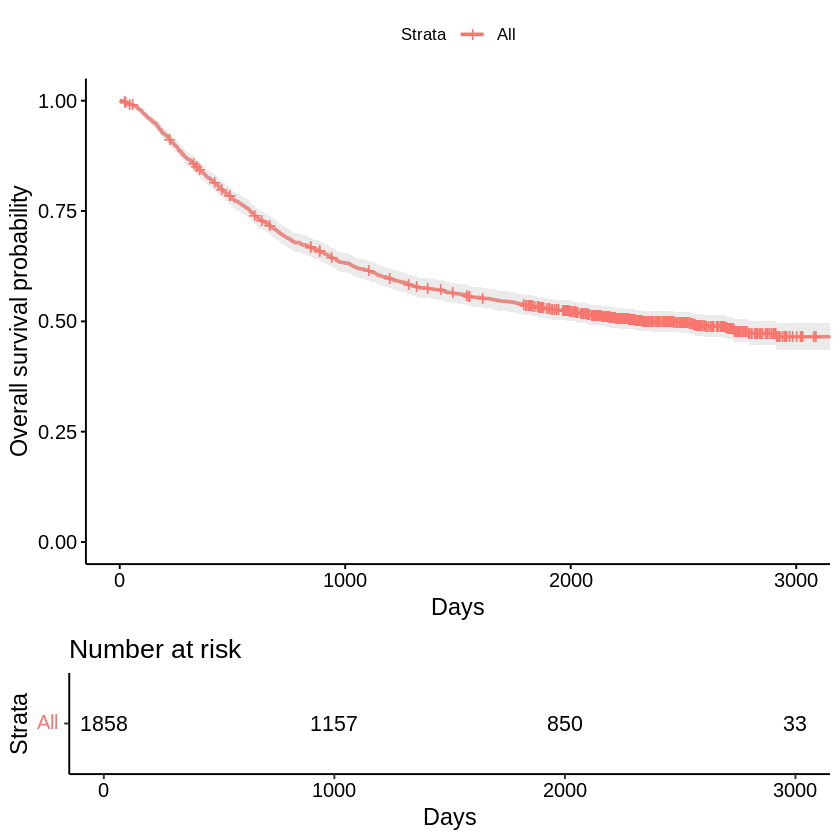

In [ ]:
# Визуализация кривой
ggsurvplot(km_fit,
           data = colon_cancer_data,
           conf.int = TRUE, # доверительные интервалы
          #  pval = TRUE,
           risk.table = TRUE,
           xlab = "Days",
           ylab = "Overall survival probability")

In [ ]:
summary(km_fit, times = 365.25)

Call: survfit(formula = Surv(time, status) ~ 1, data = colon_cancer_data)

 time n.risk n.event survival std.err lower 95% CI upper 95% CI
  365   1550     300    0.838 0.00856        0.822        0.855

In [ ]:
# km_fit %>%
#   tbl_survfit(
#     times = 365.25,
#     label_header = "**1-year survival (95% CI)**")

### Ковариаты

#### Гипотеза 1

**Нулевая гипотеза (H0):** Тип лечения и пол не влияют на выживаемость пациентов с раком толстой кишки.

**Альтернативная гипотеза (H1):** Тип лечения и/или пол влияют на выживаемость пациентов с раком толстой кишки.

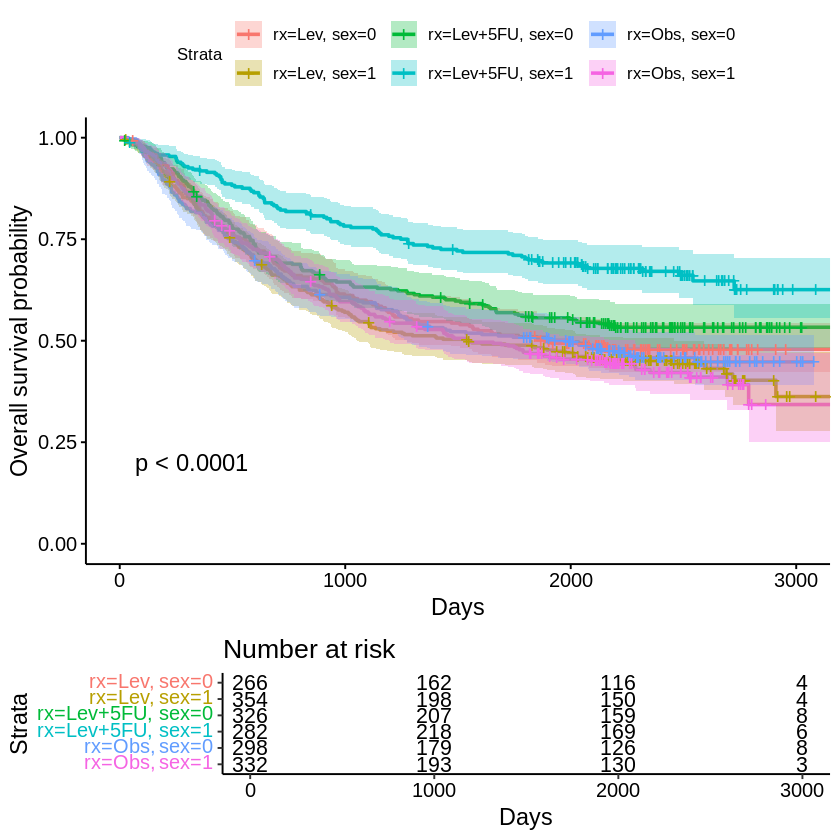

In [ ]:
km_fit_cov_1 <- survfit(Surv(time, status) ~ rx + sex, data = colon_cancer_data)

# Визуализация кривой выживаемости с доверительными интервалами и таблицей риска
ggsurvplot(km_fit_cov_1,
           data = colon_cancer_data,
           conf.int = TRUE,
           pval = TRUE,
           risk.table = TRUE,
           xlab = "Days",
           ylab = "Overall survival probability")

In [ ]:
# Выполнение теста лог-ранга
log_rank_test <- survdiff(Surv(time, status) ~ rx + sex, data = colon_cancer_data)

# Получение p-значения из теста лог-ранга
p_value <- 1 - pchisq(log_rank_test$chisq, length(log_rank_test$n) - 1)
print(p_value)

[1] 2.252134e-08


Полученное p-значение (2.252134e-08) меньше уровня значимости 0.05, поэтому мы отвергаем нулевую гипотезу в пользу альтернативной.

#### Гипотеза 2

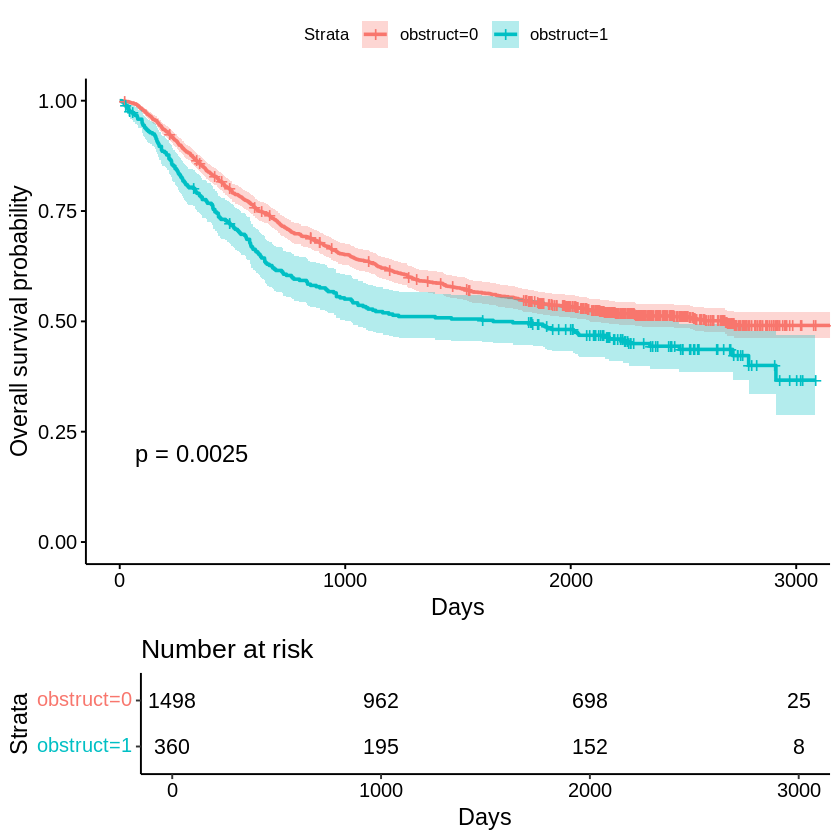

In [ ]:
# Создание объекта выживаемости с учетом комбинации ковариатов
km_fit_cov_2 <- survfit(Surv(time, status) ~ obstruct, data = colon_cancer_data)

# Визуализация кривой выживаемости с доверительными интервалами и таблицей риска
ggsurvplot(km_fit_cov_2,
           data = colon_cancer_data,
           conf.int = TRUE,
           pval = TRUE,
           risk.table = TRUE,
           xlab = "Days",
           ylab = "Overall survival probability")

In [ ]:
# Выполнение теста лог-ранга
log_rank_test <- survdiff(Surv(time, status) ~ obstruct, data = colon_cancer_data)

# Получение p-значения из теста лог-ранга
p_value <- 1 - pchisq(log_rank_test$chisq, length(log_rank_test$n) - 1)
print(p_value)

[1] 0.002542522


Полученное p-значение (0.002542522) меньше уровня значимости 0.05, поэтому мы отвергаем нулевую гипотезу в пользу альтернативной. Это означает, что есть статистически значимая разница в выживаемости между группами пациентов с наличием и отсутствием кишечной непроходимости.

## Сравнение выживаемости двух групп

Построение кривых выживаемости для различных типов лечения

**Нулевая гипотеза (H0):** Нет различий в выживаемости между группами лечения.

**Альтернативная гипотеза (H1):** Существуют различия в выживаемости между группами лечения.

Эти гипотезы предполагают, что нет различий в выживаемости между группами в нулевой гипотезе, в то время как альтернативная гипотеза предполагает наличие различий.

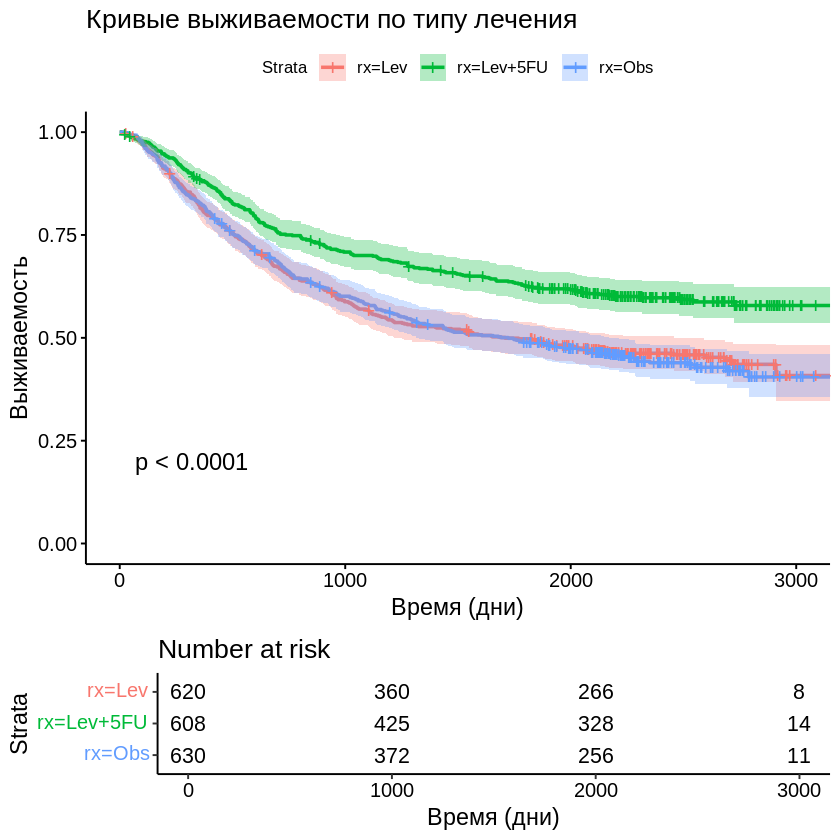

In [ ]:
km_fit_rx <- survfit(surv_object ~ rx, data = colon_cancer_data)

# Визуализация кривых выживаемости для различных типов лечения
ggsurvplot(km_fit_rx,
           data = colon_cancer_data,
           conf.int = TRUE,
           pval = TRUE,
           risk.table = TRUE,
           xlab = "Время (дни)",
           ylab = "Выживаемость",
           legend.labs = levels(colon_cancer_data$rx),
           title = "Кривые выживаемости по типу лечения"
          #  palette = c("#E7B800", "#2E9FDF")
           )


In [ ]:
# Лог-ранговый тест для сравнения групп по типу лечения
log_rank_test <- survdiff(Surv(time, status) ~ rx, data = colon_cancer_data)

# Вывод результатов лог-рангового теста
log_rank_test

Call:
survdiff(formula = Surv(time, status) ~ rx, data = colon_cancer_data)

             N Observed Expected (O-E)^2/E (O-E)^2/V
rx=Lev     620      333      295      4.93      7.26
rx=Lev+5FU 608      242      326     21.61     33.54
rx=Obs     630      345      299      7.01     10.40

 Chisq= 33.6  on 2 degrees of freedom, p= 5e-08 

В данном случае значение p-значения очень мало (5e-08), что указывает на статистически значимые различия в выживаемости между группами лечения. Таким образом, мы можем отклонить нулевую гипотезу и сделать вывод о том, что есть статистически значимые различия в выживаемости между по крайней мере одной из пар групп лечения.